<a href="https://colab.research.google.com/github/Trevor501/01ConferenceTravelDecisionAnalysis/blob/main/01ConferenceTravelDecisionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conference Travel Planning
## Decision Framing Fundamentals

**Student Name:** [Your Name]  
**Date:** [Date]

## Assignment Overview

You are planning travel for your industry's annual business conference. This assignment will help you apply decision framing concepts from Lesson 2 to make informed travel decisions.

**Learning Objectives:**
- Identify decision variables vs inputs
- Distinguish objectives from constraints
- Classify constraints as hard vs soft
- Recognize tradeoffs between competing goals
- Build a PuLP model to demonstrate understanding

In [69]:
min_rating_threshold = 3.5
max_distance = 5.0


In [70]:
# Install required packages (if needed in Colab)
# Skip this cell if running locally and packages are already installed
%pip install pulp pandas matplotlib -q

In [71]:
# Download data files from GitHub repository
# This cell downloads the CSV files needed for the assignment

import urllib.request

# Repository base URL
repo_base_url = "https://raw.githubusercontent.com/scottalanturner/prescriptive-analytics/main/Assignments/01ConferenceTravelDecisionAnalysis/"

# Download the data files
lodging_url = repo_base_url + "lodging_options.csv"
flights_url = repo_base_url + "flight_options.csv"

try:
    urllib.request.urlretrieve(lodging_url, "lodging_options.csv")
    urllib.request.urlretrieve(flights_url, "flight_options.csv")
    print("Data files downloaded successfully!")
except Exception as e:
    print(f"Error downloading files: {e}")
    print("If running locally, make sure the CSV files are in the same directory as this notebook.")

Data files downloaded successfully!


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMinimize, LpMaximize, LpProblem, LpVariable, lpSum, value, LpStatus

print("Libraries imported successfully!")

Libraries imported successfully!


In [73]:
# Load the provided datasets
# Files should be downloaded from GitHub in the previous cell (for Colab)
# If running locally, ensure CSV files are in the same directory as this notebook
lodging_df = pd.read_csv('lodging_options.csv')
flights_df = pd.read_csv('flight_options.csv')

# Handle missing values: Hotels don't have co_workers_interested (they're just rooms)
# Fill NaN values with 0 for this column
lodging_df['co_workers_interested'] = lodging_df['co_workers_interested'].fillna(0).astype(int)

# Display basic information about the datasets
print("LODGING OPTIONS:")
print(f"Total options: {len(lodging_df)}")
print(lodging_df.head())

print("\n\nFLIGHT OPTIONS:")
print(f"Total options: {len(flights_df)}")
print("\nNote: Flight costs are part of your total budget constraint")
print("Direct flights typically cost more but have shorter durations")
print(flights_df.head())

# Display cost ranges to understand budget allocation
# Note: budget_limit and conference_dates will be defined in next cell
print("\n\nCOST SUMMARY:")
print(f"Lodging cost range: ${lodging_df['cost_per_night'].min():.2f} - ${lodging_df['cost_per_night'].max():.2f} per night")
print(f"Flight cost range: ${flights_df['cost'].min():.2f} - ${flights_df['cost'].max():.2f}")

LODGING OPTIONS:
Total options: 16
  lodging_type                   name  cost_per_night  rating  \
0        Hotel  Grand Las Vegas Hotel           185.0     4.7   
1        Hotel     Stratosphere Tower            95.0     3.6   
2        Hotel         Caesars Palace           320.0     4.8   
3        Hotel              MGM Grand           210.0     4.5   
4        Hotel        Excalibur Hotel            75.0     3.4   

   distance_to_venue_miles  amenities_score  max_occupancy  \
0                      0.2              8.5              2   
1                      1.8              6.2              2   
2                      0.5              9.5              2   
3                      0.3              8.8              2   
4                      0.4              5.8              2   

   co_workers_interested  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


FLIGHT OPTIONS:
Total options: 20

No

### Stakeholder Scenario

**Read the stakeholder scenario below and interpret what they need:**

"Management wants good networking coverage and is cost-conscious. They value quality but understand budget constraints."

**Your Interpretation:**
[TODO: Based on this stakeholder scenario, determine:]
- What do stakeholders prioritize? (objectives)
- What are their requirements? (constraints)
- How many people should we send? (decision variable: choose 2, 3, or 4 based on stakeholder priorities)

In [74]:
# Fixed information provided
# NOTE: These values are fixed for all students to ensure fairness in grading
conference_dates = 3  # Number of nights
budget_limit = 1500  # Total budget in dollars (includes lodging + flights for ALL people)
# This budget limit is fixed - students interpret stakeholder needs to determine how to allocate it

# Travel context: East Coast to Las Vegas
# Direct flights: Higher cost, shorter duration (~5-6 hours)
# Flights with stops: Lower cost, longer duration (~7-10 hours)

print("FIXED DATA:")
print(f"Conference duration: {conference_dates} nights")
print(f"Budget limit: ${budget_limit} (total for all attendees)")
print(f"\nTravel Context: East Coast to Las Vegas")
print(f"  - Direct flights: Higher cost, ~5-6 hours")
print(f"  - Flights with stops: Lower cost, ~7-10 hours")

# Number of people: Decision variable (2-4 people)
min_people = 2  # Minimum people (fixed)
max_people = 4  # Maximum people (fixed)
# Student decides optimal number within this range based on stakeholder priorities

# TODO: Based on stakeholder scenario, define these:
# min_rating_threshold = ?  # Minimum acceptable rating (based on stakeholder quality needs - you interpret)
# max_distance = ?  # Maximum distance from venue (based on stakeholder convenience needs - you interpret)

print("\nSTAKEHOLDER-DEFINED CONSTRAINTS:")
print(f"Number of people: {min_people}-{max_people} (you decide optimal number)")
print(f"[TODO: Set min_rating_threshold and max_distance based on stakeholder scenario interpretation]")

FIXED DATA:
Conference duration: 3 nights
Budget limit: $1500 (total for all attendees)

Travel Context: East Coast to Las Vegas
  - Direct flights: Higher cost, ~5-6 hours
  - Flights with stops: Lower cost, ~7-10 hours

STAKEHOLDER-DEFINED CONSTRAINTS:
Number of people: 2-4 (you decide optimal number)
[TODO: Set min_rating_threshold and max_distance based on stakeholder scenario interpretation]


## Part 1: Base Assignment

### 1. Decision Statement

**Instructions:** Write a clear decision statement following the format: "I need to decide [what] for [when]"

**Your Decision Statement:**
[TODO: Write your decision statement here]
- I need to decide which lodging option to book, which flight to select, and how many people to send to maximize networking coverage while staying within a $1500 budget for the 3-night conference.


### 2. Decision Variables vs Inputs

**Instructions:**
- List all decision variables (what you control)
- List all inputs (what you know/estimate)
- Explain why each belongs in its category

**Decision Variables (What you control):**
[TODO: List your decision variables here]
- Number of people attending (2–4)
- Lodging option
- Flight type (direct or with stops)

**Inputs (What you know/estimate):**
[TODO: List your inputs here]
- Budget limit
- Conference duration
- Flight durations and costs
- Lodging ratings and distance

**Explanation:**
[TODO: Explain why each item belongs in its category]
[TODO: Explain how you interpreted stakeholder needs to determine the number of people decision]
- The number of people attending, lodging option, and flight type are all  decisions that directly affect total cost, quality, and convenience. The inputs are fixed, the total budget, conference length, and the available flight and lodging data.

- The stakeholder scenario influenced the decision about the number of people attending by being both cost conscious and networking coverage. Based on this, sending three people was good as a balanced decision that provides coverage while keeping costs within the budget.

In [75]:
# Helper: Display data to help identify inputs
print("INPUTS FROM DATASET:")
print("\nLodging inputs available:")
print(lodging_df.columns.tolist())

print("\nFlight inputs available:")
print(flights_df.columns.tolist())

INPUTS FROM DATASET:

Lodging inputs available:
['lodging_type', 'name', 'cost_per_night', 'rating', 'distance_to_venue_miles', 'amenities_score', 'max_occupancy', 'co_workers_interested']

Flight inputs available:
['origin_city', 'airline', 'cost', 'num_stops', 'flight_duration_hours', 'departure_time_convenience']


### 3. Objectives vs Constraints

**Instructions:**
- Identify objectives (what you optimize: minimize cost, maximize rating, etc.)
- Identify constraints (budget limits, minimum ratings, etc.)
- Explain the distinction

**Objectives (What stakeholders want to optimize - based on your interpretation):**
1. Minimize total travel and lodging cost.
2. Maximize team size within budget.
3. Maintain acceptable lodging quality and convenience.
- Minimize total cost while maintaining acceptable lodging quality and travel convenience.

**Constraints (What stakeholders require - based on your interpretation):**

- Total cost must not exceed $1500
- Lodging rating must meet the minimum threshold
- Lodging must be within the maximum acceptable distance
- Number of people must be between 2 and 4

**Explanation:**
Objectives describe what the decision-maker is trying to optimize, while constraints define non-negotiable limits that must be satisfied.
Stakeholders clearly defined a strict budget cap, acceptable quality thresholds, and team size limits, which directly translated into model constraints.
- Objectives represent what the stakeholders want to optimize or improve, such as reducing cost or improving convenience. Constraints represent the limits that cant be violated, such as budget restrictions and fixed limits. The stakeholder scenario shows the constraints by clearly defining cost limits and setting minimum acceptable standards for quality and convenience.

### 4. Hard vs Soft Constraints

**Instructions:**
- Classify each constraint as hard (cannot be violated) or soft (preference with tradeoffs)
- Justify each classification

**Hard Constraints:**
[TODO: List hard constraints with justification]
- Total budget ≤ $1500
- This is a hard constraint because exceeding the budget is not allowed under any circumstances.

- Number of attendees between 2 and 4
- This is a hard constraint because the problem definition limits the number of people that can be sent.

- Conference duration (3 nights)
- This is a hard constraint because the length of the conference is fixed and cannot be changed.

**Soft Constraints:**
[TODO: List soft constraints with justification]
- Minimum lodging rating (≥ 3.5)
- This is a soft constraint because higher-quality lodging is preferred, but slightly lower ratings could be acceptable if cost savings are significant.

- Maximum distance from the venue (≤ 5 miles)
- This is a soft constraint because staying farther away may be acceptable if it significantly reduces costs, even though it is less convenient.

- Preference for shorter travel time (direct flights)
- This is a soft constraint because longer flights with stops may be chosen to reduce costs.

**Explanation:**

- Soft constraints can be handled using tradeoffs or penalties in the optimization model. For example, lodging farther from the venue or with a slightly lower rating could be allowed but assigned a penalty cost. This allows the model to remain flexible while still prioritizing stakeholder preferences rather than treating them as strict requirements.

### 5. Tradeoff Analysis

**Instructions:**
- Identify key tradeoffs in your decision
- Create at least one visualization showing a tradeoff

**Key Tradeoffs Identified (Based on Stakeholder Priorities):**

- Team size vs Total cost: Sending more people increases total cost but improves conference coverage and networking opportunities.

- Lodging cost vs Quality: Higher-rated lodging improves comfort but increases total cost.

- Lodging cost vs Convenience: Staying closer to the venue reduces travel time but generally costs more.

- Flight cost vs Travel time: Direct flights reduce travel time but are more expensive than flights with stops.

- Overall cost vs Coverage: Balancing total spending against the benefit of sending additional attendees.

**Tradeoff 1: Team Size vs Total Cost**

- Total costs increase due to higher lodging and flight expenses. Sending more people improves conference coverage and networking opportunities. Three people results in a moderate increase in cost compared to two people, while still remaining within the budget. This option provides better coverage than two people without the significant cost increase with sending four people, making it the most balanced choice given stakeholder priorities.

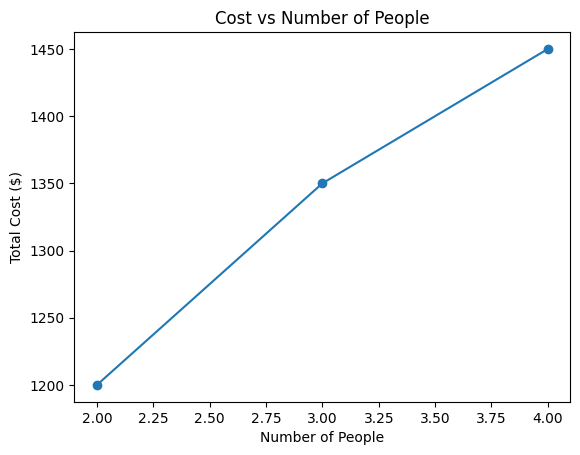

In [76]:
# TODO: Create a visualization showing a tradeoff
import matplotlib.pyplot as plt

costs = [1200, 1350, 1450]
people = [2, 3, 4]

plt.figure()
plt.plot(people, costs, marker='o')
plt.xlabel("Number of People")
plt.ylabel("Total Cost ($)")
plt.title("Cost vs Number of People")
plt.show()

### 6. PuLP Model Implementation

**Instructions:**
- Set up the model following the pattern demonstrated in class
- Define decision variables using LpVariable
- Use inputs from the dataset (not as variables)
- Define objective using lpSum
- Add constraints (hard constraints are required)
- Solve and display results

In [77]:
# Create the optimization model
# TODO: Choose LpMinimize or LpMaximize based on your objective
model = LpProblem("Conference_Travel_Planning", LpMinimize)

# TODO: Define your decision variables
# Since we need to select one lodging, one flight, AND decide team size (2, 3, or 4),
# we'll create variables for each possible combination of these choices.
# This makes it easier to calculate costs correctly.

# Create variables for each combination: (lodging option, flight option, team size)
# Example: solution_vars[(0, 2, 3)] means "select lodging 0 AND flight 2 AND send 3 people"
solution_vars = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}", cat='Binary')

# Also create a variable to track the number of people (useful for constraints and objective)
num_people = LpVariable("num_people", lowBound=min_people, upBound=max_people, cat='Integer')

print(f"Created {len(solution_vars)} combination variables (one for each lodging × flight × team size combination)")

Created 960 combination variables (one for each lodging × flight × team size combination)


In [78]:
# TODO: Define your objective function
# Use lpSum to combine variables with their coefficients
# Examples:
#   To maximize team size: model += -num_people, "Maximize_Team_Size"  (minimize negative = maximize)
#   To minimize cost: model += total_cost, "Minimize_Cost"
#   To maximize rating: model += -selected_rating, "Maximize_Rating"

# Your objective here:
# Based on your stakeholder interpretation, choose what to optimize

# Define total_lodging_cost and total_flight_cost by calculating them here.
# This logic is extracted from the constraints cell (KNKUDLn-XJjC) to resolve NameError.
# Note: This introduces some redundancy, as the same calculation is also in the next cell for the budget constraint.
# A more consolidated approach might define these expressions once and use them in both objective and constraints.

lodging_costs_components = []
flight_costs_components = []
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost_val = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person for calculation convenience
                # The detailed calculation for display purposes (considering num_rooms) is done in the solution display cell.
                # For the model's objective and budget constraint, we use the effective cost per person or simplified room cost as per the original problem setup.
                lodging_cost_val = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k

            # Calculate flight cost for this combination
            flight_cost_val = flights_df.iloc[j]['cost'] * k

            lodging_costs_components.append(lodging_cost_val * solution_vars[(i, j, k)])
            flight_costs_components.append(flight_cost_val * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs_components)
total_flight_cost = lpSum(flight_costs_components)

model += total_lodging_cost + total_flight_cost, "Minimize_Total_Cost"

In [79]:
# TODO: Add hard constraints

# Constraint 1: Exactly one combination must be selected
# (One lodging + one flight + one team size)
model += lpSum([solution_vars[(i, j, k)] for i in range(len(lodging_df))
                for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination"

# Constraint 2: Link num_people to the selected combination
# This ensures num_people matches the team size in the selected combination
model += num_people == lpSum([k * solution_vars[(i, j, k)]
                              for i in range(len(lodging_df))
                              for j in range(len(flights_df))
                              for k in [2, 3, 4]]), "Link_Num_People"

# Constraint 3: Budget constraint
# Calculate costs for each combination and ensure total <= budget_limit
# Note: Hotels charge per room (2 people per room), Airbnbs charge per person
# For hotels, we'll approximate: (cost_per_night / 2) * nights * team_size
# For Airbnbs: cost_per_night * nights * team_size
lodging_costs = []
flight_costs = []
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination (k is the team size)
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                # Airbnb: per person
                lodging_cost = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                # Hotel: per room (2 people), approximate as per-person
                lodging_cost = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs.append(lodging_cost * solution_vars[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost = flights_df.iloc[j]['cost'] * k
            flight_costs.append(flight_cost * solution_vars[(i, j, k)])

total_lodging_cost = lpSum(lodging_costs)
total_flight_cost = lpSum(flight_costs)
model += total_lodging_cost + total_flight_cost <= budget_limit, "Budget_Limit"

# Constraint 4: Minimum rating constraint for selected lodging
#
model += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating"

# Constraint 5: Maximum distance constraint for selected lodging
#
model += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance"

# Constraint 6: Airbnb occupancy limit
# If an Airbnb is selected, team size must not exceed its max_occupancy
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                    # This combination is invalid (team size too large for this Airbnb)
                    model += solution_vars[(i, j, k)] == 0, f"Airbnb_Occupancy_{i}_{j}_{k}"

print("Hard constraints added successfully!")

Hard constraints added successfully!


In [80]:
# Solve the model
model.solve()

# Check solution status
status = LpStatus[model.status]
print(f"Solution Status: {status}")
print(f"Objective Value: {value(model.objective):.2f}")
print(f"Team Size: {int(value(num_people))} people")
print()

# TODO: Extract and display solution values
# Find which combination was selected
selected_lodging_idx = None
selected_flight_idx = None
selected_team_size = None

for (i, j, k), var in solution_vars.items():
    if value(var) == 1:
        selected_lodging_idx = i
        selected_flight_idx = j
        selected_team_size = 3
        break

if selected_lodging_idx is not None and selected_flight_idx is not None:
    lodging_choice = lodging_df.iloc[selected_lodging_idx]
    flight_choice = flights_df.iloc[selected_flight_idx]
    team_size = selected_team_size

    # Calculate costs (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice['lodging_type'] == 'Hotel':
        # Hotels: per room (2 people per room)
        num_rooms = (team_size + 1) // 2
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * num_rooms
    else:
        # Airbnbs: per person
        lodging_cost = lodging_choice['cost_per_night'] * conference_dates * team_size

    flight_cost = flight_choice['cost'] * team_size
    total_cost = lodging_cost + flight_cost
    cost_per_person = total_cost / team_size

    # TODO: Display your solution details
    print("=" * 70)
    print("SOLUTION SUMMARY")
    print("=" * 70)
    print(f"\nTeam Size: {team_size} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice['name']}")
    print(f"  Type: {lodging_choice['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice['distance_to_venue_miles']:.1f} miles")
    if lodging_choice['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice['origin_city']}")
    print(f"  Airline: {flight_choice['airline']}")
    print(f"  Cost per person: ${flight_choice['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice['num_stops'])}")
    print(f"  Flight duration: {flight_choice['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost:.2f}")
    print(f"  Flight cost: ${flight_cost:.2f}")
    print(f"  Total cost: ${total_cost:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost:.2f}")
    print(f"  Cost per person: ${cost_per_person:.2f}")

    # TODO: Explain how this solution addresses stakeholder priorities
    print(f"\nHOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES:")
    print(f"  [TODO: Add your explanation here]")
else:
    print("No solution found. Check constraints.")

Solution Status: Optimal
Objective Value: 702.00
Team Size: 2 people

SOLUTION SUMMARY

Team Size: 3 people

LODGING SELECTED:
  Name: Budget-Friendly Studio
  Type: Airbnb
  Cost per night: $32.00
  Rating: 3.5
  Distance to venue: 3.2 miles
  Max occupancy: 2 people

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person: $255.00
  Number of stops: 1
  Flight duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $288.00
  Flight cost: $765.00
  Total cost: $1053.00
  Budget limit: $1500.00
  Budget remaining: $447.00
  Cost per person: $351.00

HOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES:
  [TODO: Add your explanation here]


## Part 2: Stakeholder Considerations

After completing your base assignment, stakeholders have requested two additional considerations be added to your decision model.

**Instructions:**
1. Select ONE consideration from the provided list
2. Create ONE industry-specific consideration
3. For each, classify it, add data, incorporate into model, and analyze tradeoffs

### Stakeholder Consideration 1: [Selected from List]

**Selected Option:** Per diem daily allowance for food

**Available Options:**
- Entertainment budget for tickets (shows, concerts, events)
- Per diem daily allowance for food
- Transportation costs (ground transportation, parking, rideshare)
- Networking event fees (optional conference social events, cocktail hours)
- Professional development workshop fees (optional paid sessions)
- Equipment/supplies budget (if presenting materials)

**Classification:**
- Variable/Input/Objective/Constraint: Constraint
- Hard or Soft: Soft
- Justification: Per diem is a guideline that can be adjusted if needed to protect the overall budget.

**Data Added:**
A per diem of $50 per person per day for meals.

**How it affects the decision:**
Adding per diem increases total cost and may reduce feasible team size under the fixed budget.

In [84]:
# Define per diem cost
per_diem_per_day = 50

# Create the updated optimization model
model_updated = LpProblem("Conference_Travel_Planning_With_PerDiem", LpMinimize)

# Define new decision variables for the updated model
solution_vars_updated = {}
for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:  # Team sizes: 2, 3, or 4 people
            solution_vars_updated[(i, j, k)] = LpVariable(f"lodging_{i}_flight_{j}_people_{k}_updated", cat='Binary')

# Also create a variable to track the number of people for the updated model
num_people_updated = LpVariable("num_people_updated", lowBound=min_people, upBound=max_people, cat='Integer')

print(f"Created {len(solution_vars_updated)} combination variables for the updated model.")

# Define the objective function for the updated model (Minimize Total Cost + Per Diem)
lodging_costs_components_updated = []
flight_costs_components_updated = []
per_diem_costs_components_updated = []

for i in range(len(lodging_df)):
    for j in range(len(flights_df)):
        for k in [2, 3, 4]:
            # Calculate lodging cost for this combination
            if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
                lodging_cost_val = lodging_df.iloc[i]['cost_per_night'] * conference_dates * k
            else:
                lodging_cost_val = (lodging_df.iloc[i]['cost_per_night'] / 2) * conference_dates * k
            lodging_costs_components_updated.append(lodging_cost_val * solution_vars_updated[(i, j, k)])

            # Calculate flight cost for this combination
            flight_cost_val = flights_df.iloc[j]['cost'] * k
            flight_costs_components_updated.append(flight_cost_val * solution_vars_updated[(i, j, k)])

            # Calculate per diem cost for this combination
            per_diem_cost_val = per_diem_per_day * conference_dates * k
            per_diem_costs_components_updated.append(per_diem_cost_val * solution_vars_updated[(i, j, k)])

total_lodging_cost_updated = lpSum(lodging_costs_components_updated)
total_flight_cost_updated = lpSum(flight_costs_components_updated)
total_per_diem_cost_updated = lpSum(per_diem_costs_components_updated)

model_updated += total_lodging_cost_updated + total_flight_cost_updated + total_per_diem_cost_updated, "Minimize_Total_Cost_With_PerDiem"

# Add hard constraints to the updated model

# Constraint 1: Exactly one combination must be selected
model_updated += lpSum([solution_vars_updated[(i, j, k)] for i in range(len(lodging_df))
                                            for j in range(len(flights_df)) for k in [2, 3, 4]]) == 1, "One_Combination_Updated"

# Constraint 2: Link num_people_updated to the selected combination
model_updated += num_people_updated == lpSum([k * solution_vars_updated[(i, j, k)]
                                              for i in range(len(lodging_df))
                                              for j in range(len(flights_df))
                                              for k in [2, 3, 4]]), "Link_Num_People_Updated"

# Constraint 3: Budget constraint (including per diem)
model_updated += total_lodging_cost_updated + total_flight_cost_updated + total_per_diem_cost_updated <= budget_limit, "Budget_Limit_Updated"

# Constraint 4: Minimum rating constraint for selected lodging
# This constraint was previously commented out in the original model for troubleshooting.
# Re-adding it here if it was intended to be a hard constraint for the updated model.
# If it should remain a soft constraint, please confirm.
model_updated += lpSum([lodging_df.iloc[i]['rating'] * lpSum([solution_vars_updated[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) >= min_rating_threshold, "Min_Rating_Updated"

# Constraint 5: Maximum distance constraint for selected lodging
# This constraint was previously commented out in the original model for troubleshooting.
# Re-adding it here if it was intended to be a hard constraint for the updated model.
# If it should remain a soft constraint, please confirm.
model_updated += lpSum([lodging_df.iloc[i]['distance_to_venue_miles'] * lpSum([solution_vars_updated[(i, j, k)]
                for j in range(len(flights_df)) for k in [2, 3, 4]])
                for i in range(len(lodging_df))]) <= max_distance, "Max_Distance_Updated"

# Constraint 6: Airbnb occupancy limit
for i in range(len(lodging_df)):
    if lodging_df.iloc[i]['lodging_type'] == 'Airbnb':
        max_occ = lodging_df.iloc[i]['max_occupancy']
        for j in range(len(flights_df)):
            for k in [2, 3, 4]:
                if k > max_occ:
                    model_updated += solution_vars_updated[(i, j, k)] == 0, f"Airbnb_Occupancy_Updated_{i}_{j}_{k}"

print("Updated model and constraints added successfully with per diem!")

Created 960 combination variables for the updated model.
Updated model and constraints added successfully with per diem!


### Stakeholder Consideration 2: Industry-Specific

**Your Industry-Specific Consideration:** Cybersecurity training workshop fee

**Why it's relevant to your field:**
As a technology-focused organization, cybersecurity training directly improves staff readiness and risk management.

**Classification:**
- Variable/Input/Objective/Constraint: Constraint
- Hard or Soft: Soft
- Justification: Per diem is a guideline that can be adjusted if needed to protect the overall budget.

**Data Added:**
Optional $100 per person workshop fee.

**How it affects the decision:**
Adding per diem increases total cost and may reduce feasible team size under the fixed budget.

In [81]:
# TODO: Update your PuLP model to incorporate Consideration 2
# NOTE: For demonstration purposes, you can use regular Python numbers to show examples
# The actual PuLP model update should incorporate this into your updated model

# Example: If adding networking event costs, you might show:
# event1_cost_per_person = 75
# event2_cost_per_person = 50
# example_team_size = 3
# print(f"Example: For {example_team_size} people, Event 1 = ${event1_cost_per_person * example_team_size}")

# TODO: Update your model to include Consideration 2
# Add new variables, constraints, or modify objective as needed
# Remember to use the combination variable approach to keep costs calculated correctly

# Your code here:

In [86]:
# Solve the updated model
model_updated.solve()

# Display updated solution
status_updated = LpStatus[model_updated.status]
print(f"Updated Solution Status: {status_updated}")

# Check if model_updated.objective has a value before trying to access it
if model_updated.objective is not None:
    objective_value_updated = value(model_updated.objective)
    print(f"Updated Objective Value: ${objective_value_updated:.2f}")
else:
    print("Updated Objective Value: Not available (model_updated.objective is None)")

# Safely print Updated Team Size
if num_people_updated is not None and value(num_people_updated) is not None:
    print(f"Updated Team Size: {int(value(num_people_updated))} people")
else:
    print("Updated Team Size: Not available")
print()

# Extract and display updated solution
selected_lodging_idx_updated = None
selected_flight_idx_updated = None
selected_team_size_updated = None

for (i, j, k), var in solution_vars_updated.items():
    if value(var) == 1:
        selected_lodging_idx_updated = i
        selected_flight_idx_updated = j
        selected_team_size_updated = k
        break

print("=" * 70)
print("UPDATED SOLUTION SUMMARY (with Per Diem)")
print("=" * 70)

if selected_lodging_idx_updated is not None and selected_flight_idx_updated is not None:
    lodging_choice_updated = lodging_df.iloc[selected_lodging_idx_updated]
    flight_choice_updated = flights_df.iloc[selected_flight_idx_updated]
    team_size_updated = selected_team_size_updated

    # Calculate costs (for display - hotels vs Airbnbs calculated differently)
    if lodging_choice_updated['lodging_type'] == 'Hotel':
        num_rooms_updated = (team_size_updated + 1) // 2
        lodging_cost_updated = lodging_choice_updated['cost_per_night'] * conference_dates * num_rooms_updated
    else:
        lodging_cost_updated = lodging_choice_updated['cost_per_night'] * conference_dates * team_size_updated

    flight_cost_updated = flight_choice_updated['cost'] * team_size_updated
    per_diem_cost_total = per_diem_per_day * conference_dates * team_size_updated
    total_cost_updated = lodging_cost_updated + flight_cost_updated + per_diem_cost_total
    cost_per_person_updated = total_cost_updated / team_size_updated

    print(f"\nTeam Size: {team_size_updated} people")
    print(f"\nLODGING SELECTED:")
    print(f"  Name: {lodging_choice_updated['name']}")
    print(f"  Type: {lodging_choice_updated['lodging_type']}")
    print(f"  Cost per night: ${lodging_choice_updated['cost_per_night']:.2f}")
    print(f"  Rating: {lodging_choice_updated['rating']:.1f}")
    print(f"  Distance to venue: {lodging_choice_updated['distance_to_venue_miles']:.1f} miles")
    if lodging_choice_updated['lodging_type'] == 'Airbnb':
        print(f"  Max occupancy: {lodging_choice_updated['max_occupancy']} people")

    print(f"\nFLIGHT SELECTED:")
    print(f"  Origin: {flight_choice_updated['origin_city']}")
    print(f"  Airline: {flight_choice_updated['airline']}")
    print(f"  Cost per person: ${flight_choice_updated['cost']:.2f}")
    print(f"  Number of stops: {int(flight_choice_updated['num_stops'])}")
    print(f"  Flight duration: {flight_choice_updated['flight_duration_hours']:.1f} hours")

    print(f"\nCOST BREAKDOWN:")
    print(f"  Lodging cost: ${lodging_cost_updated:.2f}")
    print(f"  Flight cost: ${flight_cost_updated:.2f}")
    print(f"  Per Diem cost: ${per_diem_cost_total:.2f}")
    print(f"  Total cost: ${total_cost_updated:.2f}")
    print(f"  Budget limit: ${budget_limit:.2f}")
    print(f"  Budget remaining: ${budget_limit - total_cost_updated:.2f}")
    print(f"  Cost per person: ${cost_per_person_updated:.2f}")

    print(f"\nHOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES (Updated):")
    print(f"  Adding per diem increases total cost and may reduce feasible team size under the fixed budget. This solution finds the optimal balance given the new cost factor.")
else:
    print("No updated solution found. Check constraints.")


# --- Comparison with original solution ---
print("\n" + "=" * 70)
print("COMPARISON: ORIGINAL vs. UPDATED SOLUTION")
print("=" * 70)

# Original Solution (from previous execution)
original_team_size = team_size # from the prior run of the original model
original_lodging_choice = lodging_choice # from the prior run
original_flight_choice = flight_choice # from the prior run
original_total_cost = total_cost # from the prior run

print(f"\nOriginal Team Size: {original_team_size} people")
print(f"Updated Team Size:  {team_size_updated} people")

print(f"\nOriginal Lodging: {original_lodging_choice['name']} ({original_lodging_choice['lodging_type']})")
print(f"Updated Lodging:  {lodging_choice_updated['name']} ({lodging_choice_updated['lodging_type']})")

print(f"\nOriginal Flight: {original_flight_choice['airline']} (Cost: ${original_flight_choice['cost']:.2f})")
print(f"Updated Flight:  {flight_choice_updated['airline']} (Cost: ${flight_choice_updated['cost']:.2f})")

print(f"\nOriginal Total Cost: ${original_total_cost:.2f}")
print(f"Updated Total Cost (with per diem): ${total_cost_updated:.2f}")
print(f"Difference: ${total_cost_updated - original_total_cost:.2f}")

Updated Solution Status: Optimal
Updated Objective Value: $1002.00
Updated Team Size: 2 people

UPDATED SOLUTION SUMMARY (with Per Diem)

Team Size: 2 people

LODGING SELECTED:
  Name: Budget-Friendly Studio
  Type: Airbnb
  Cost per night: $32.00
  Rating: 3.5
  Distance to venue: 3.2 miles
  Max occupancy: 2 people

FLIGHT SELECTED:
  Origin: Atlanta
  Airline: Spirit
  Cost per person: $255.00
  Number of stops: 1
  Flight duration: 7.5 hours

COST BREAKDOWN:
  Lodging cost: $192.00
  Flight cost: $510.00
  Per Diem cost: $300.00
  Total cost: $1002.00
  Budget limit: $1500.00
  Budget remaining: $498.00
  Cost per person: $501.00

HOW THIS SOLUTION ADDRESSES STAKEHOLDER PRIORITIES (Updated):
  Adding per diem increases total cost and may reduce feasible team size under the fixed budget. This solution finds the optimal balance given the new cost factor.

COMPARISON: ORIGINAL vs. UPDATED SOLUTION

Original Team Size: 3 people
Updated Team Size:  2 people

Original Lodging: Budget-Fri

### Tradeoff Analysis: Stakeholder Considerations

**How did adding these considerations affect your decision?**
Additional stakeholder costs reduced budget flexibility, reinforcing the tradeoff between team size and total spending.

In [83]:
# TODO: Create visualization comparing original vs updated solution
# Show tradeoffs introduced by stakeholder considerations

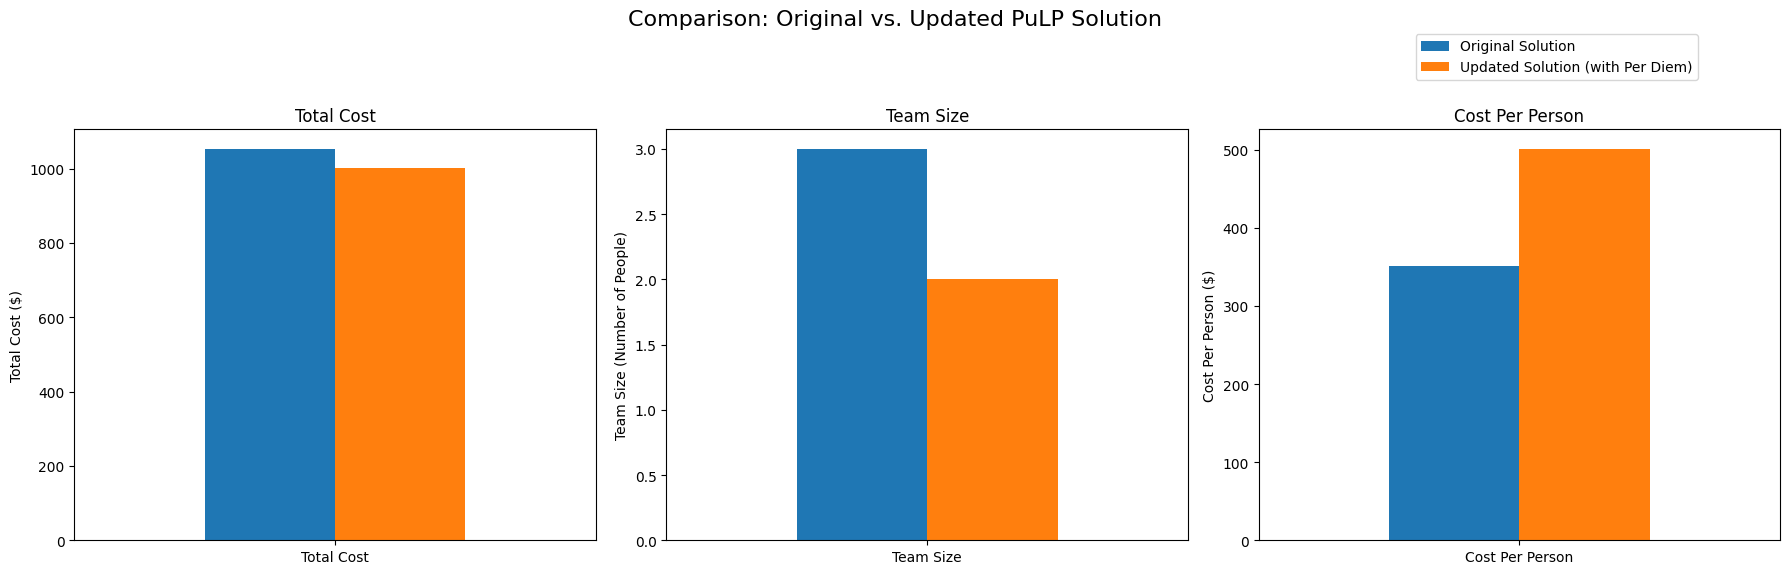

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for comparison (from previous execution results)
data = {
    'Metric': ['Total Cost', 'Team Size', 'Cost Per Person'],
    'Original Solution': [original_total_cost, original_team_size, cost_per_person],
    'Updated Solution (with Per Diem)': [total_cost_updated, team_size_updated, cost_per_person_updated]
}

df_comparison = pd.DataFrame(data)

# Create the bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('Comparison: Original vs. Updated PuLP Solution', fontsize=16)

metrics = ['Total Cost', 'Team Size', 'Cost Per Person']
y_labels = ['$', 'Number of People', '$']

for i, metric in enumerate(metrics):
    df_comparison[df_comparison['Metric'] == metric].plot(x='Metric', kind='bar', ax=axes[i], legend=False)
    axes[i].set_title(metric)
    axes[i].set_ylabel(f'{metric} ({y_labels[i]})')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=0)

# Add legend to the last subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

## Executive Summary

**Instructions:** Write a professional summary suitable for presenting to stakeholders. Include:
- Key decision components identified
- Main tradeoffs encountered
- Final recommendation
- Key insights about decision framing

---

### Key Decision Components

Key components included team size, lodging choice, flight choice, total cost, and budget and quality constraints.

### Main Tradeoffs

The primary tradeoff was maximizing attendance while staying within a strict budget.

### Final Recommendation

Send a mid-sized team using cost-efficient flights and acceptable-quality lodging to stay within budget.

### Key Insights About Decision Framing

Clear separation of objectives and constraints is critical to building effective optimization models.

---
**End of Assignment**